# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [1]:
#Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as stats
df = pd.read_csv("homepage_actions.csv")
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


<AxesSubplot:>

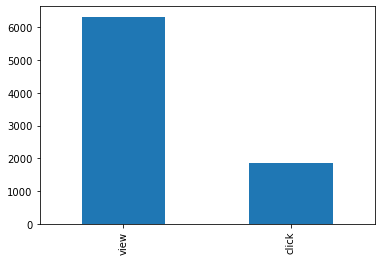

In [5]:
df['action'].value_counts().plot.bar()

<AxesSubplot:>

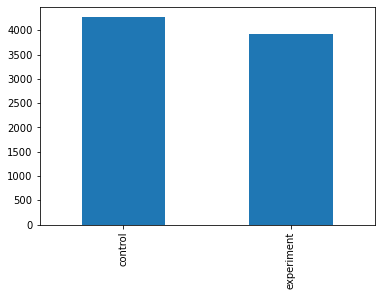

In [17]:
df["group"].value_counts().plot.bar()

In [15]:
pd.crosstab(df.group, df.action, margins=True, margins_name="Total")

action,click,view,Total
group,,,
control,932,3332,4264
experiment,928,2996,3924
Total,1860,6328,8188


Everything looks fine and there seems to be no anomalies in the dataset

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [22]:
#Your code here

table = pd.crosstab(df.group, df.action)
chi2, p, dof, ex = stats.chi2_contingency(table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 3.636160051233291
p-value: 0.056537191086915774


According the p-value of 0.056 which is greater than 0.05, it is evident that we will fail to reject the null hypothesis and conclude that experimental homepage was not statistically significant than the control group.

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [13]:
#Your code here

experiment_click_rate = 928/ 3924
print("experiment click through rate:", experiment_click_rate)
contol_click_rate = 932/ 4264
print("control_click_through_rate:", contol_click_rate)

experiment click through rate: 0.23649337410805302
control_click_through_rate: 0.21857410881801126


### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [ ]:
#Your code here

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [ ]:
#Your code here

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.